### ***Loading the Necessary Libraries***

In [1]:
from keras.layers import Input, Dense, Flatten
from keras.models import Model, Sequential
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

#### ***Geting the Datasets Path***

In [2]:
train_path='../input/chest-xray-pneumonia/chest_xray/train'
val_path='../input/chest-xray-pneumonia/chest_xray/val'
test_path='../input/chest-xray-pneumonia/chest_xray/test'

image_shape=[224, 224]

#### ***ResNet model***

In [3]:
resnet=ResNet50(input_shape=image_shape + [3], weights='imagenet', include_top=False) #Without top layers
resnet

94773248/94765736 [==============================] - 1s 0us/step


##### **No train for the RestNet layers as they are pretrained**

In [4]:
for layers in resnet.layers:
    layers.trainable=False

##### **Finding the output classes**

In [5]:
classes=glob('../input/chest-xray-pneumonia/chest_xray/train/*')
classes

['../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA',
 '../input/chest-xray-pneumonia/chest_xray/train/NORMAL']

##### **Making the top layers**

In [6]:
x=Flatten()(resnet.output)
d=Dense(256, activation='relu')(x)
prediction=Dense(len(classes), activation='softmax')(d)
model=Model(inputs=resnet.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [7]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [8]:
train_datagen=ImageDataGenerator(rescale=1/255, shear_range=0.1, zoom_range=0.1, horizontal_flip=True)

In [9]:
test_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)

In [10]:
training_set=train_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/train', target_size=(224, 224), batch_size=32, class_mode='categorical')

Found 5216 images belonging to 2 classes.


In [11]:
test_set=test_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/test', target_size=(224, 224), batch_size=32, class_mode='categorical')

Found 624 images belonging to 2 classes.


In [12]:
val_set=val_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/val', target_size=(224, 224), batch_size=32, class_mode='categorical')

Found 16 images belonging to 2 classes.


In [13]:
fit=model.fit(training_set, validation_data=val_set, epochs=10, steps_per_epoch=len(training_set), validation_steps=len(val_set))

Epoch 1/10
163/163 [==============================] - 174s 1s/step - loss: 1.4933 - accuracy: 0.6808 - val_loss: 0.9421 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 118s 724ms/step - loss: 0.4017 - accuracy: 0.7802 - val_loss: 0.7580 - val_accuracy: 0.6250
Epoch 3/10
163/163 [==============================] - 116s 712ms/step - loss: 0.3392 - accuracy: 0.8526 - val_loss: 1.0316 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 117s 720ms/step - loss: 0.3040 - accuracy: 0.8687 - val_loss: 1.0229 - val_accuracy: 0.6250
Epoch 5/10
163/163 [==============================] - 119s 729ms/step - loss: 0.2893 - accuracy: 0.8778 - val_loss: 0.5503 - val_accuracy: 0.6875
Epoch 6/10
163/163 [==============================] - 118s 719ms/step - loss: 0.2680 - accuracy: 0.8829 - val_loss: 1.8514 - val_accuracy: 0.6250
Epoch 7/10
163/163 [==============================] - 119s 730ms/step - loss: 0.2803 - accuracy: 0.8843 - val_loss: 0.7620 - va

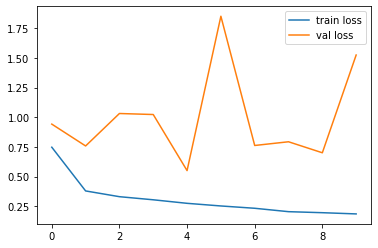

In [14]:
plt.plot(fit.history['loss'], label='train loss')
plt.plot(fit.history['val_loss'], label='val loss')
plt.legend()
plt.show()

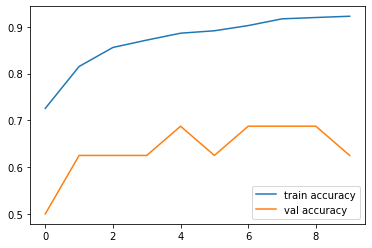

In [15]:
plt.plot(fit.history['accuracy'], label='train accuracy')
plt.plot(fit.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

In [16]:
model.evaluate(test_set)

20/20 [==============================] - 11s 541ms/step - loss: 0.9395 - accuracy: 0.6971


[0.939464271068573, 0.6971153616905212]

#### ***VGG16 Model***

##### **Same as ResNet**

In [17]:
from keras.applications.vgg16 import VGG16

In [18]:
vgg=VGG16(input_shape=image_shape + [3], weights='imagenet', include_top=False)
vgg

58892288/58889256 [==============================] - 1s 0us/step


In [19]:
for layers in vgg.layers:
    layers.trainable=False

In [20]:
x=Flatten()(vgg.output)
d=Dense(256, activation='relu')(x)
prediction=Dense(len(classes), activation='softmax')(d)
model=Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [21]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [22]:
fit=model.fit(training_set, validation_data=val_set, epochs=10, steps_per_epoch=len(training_set), validation_steps=len(val_set))

Epoch 1/10
163/163 [==============================] - 121s 721ms/step - loss: 0.5151 - accuracy: 0.8927 - val_loss: 0.5354 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 118s 722ms/step - loss: 0.1138 - accuracy: 0.9598 - val_loss: 0.0728 - val_accuracy: 0.9375
Epoch 3/10
163/163 [==============================] - 118s 724ms/step - loss: 0.0780 - accuracy: 0.9705 - val_loss: 0.1995 - val_accuracy: 0.9375
Epoch 4/10
163/163 [==============================] - 117s 717ms/step - loss: 0.0817 - accuracy: 0.9694 - val_loss: 0.1454 - val_accuracy: 0.9375
Epoch 5/10
163/163 [==============================] - 118s 718ms/step - loss: 0.0485 - accuracy: 0.9809 - val_loss: 0.0538 - val_accuracy: 1.0000
Epoch 6/10
163/163 [==============================] - 116s 714ms/step - loss: 0.0746 - accuracy: 0.9735 - val_loss: 0.1198 - val_accuracy: 0.9375
Epoch 7/10
163/163 [==============================] - 117s 721ms/step - loss: 0.0474 - accuracy: 0.9817 - val_loss: 0.0866 -

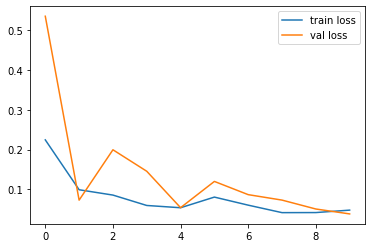

In [23]:
plt.plot(fit.history['loss'], label='train loss')
plt.plot(fit.history['val_loss'], label='val loss')
plt.legend()
plt.show()

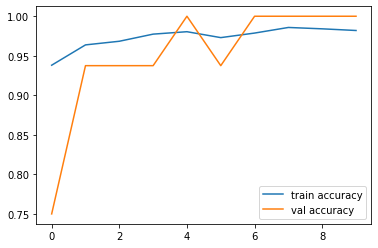

In [24]:
plt.plot(fit.history['accuracy'], label='train accuracy')
plt.plot(fit.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

In [25]:
model.evaluate(test_set)

20/20 [==============================] - 7s 328ms/step - loss: 0.3233 - accuracy: 0.9183


[0.3232859969139099, 0.9182692170143127]